Example of how to use xgcm

In [3]:
!pip install git+https://github.com/xgcm/xgcm.git

  Cloning https://github.com/xgcm/xgcm.git to /tmp/pip-2dyivz91-build
  Running setup.py install for xgcm ... done
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import xarray as xr
import numpy as np
import xgcm
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

In [5]:
!wget http://www.ldeo.columbia.edu/~rpa/mitgcm_example_dataset.nc

--2018-05-02 14:32:40--  http://www.ldeo.columbia.edu/~rpa/mitgcm_example_dataset.nc
Resolving www.ldeo.columbia.edu... 129.236.14.15
Connecting to www.ldeo.columbia.edu|129.236.14.15|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20396931 (19M) [application/x-netcdf]
Saving to: ‘mitgcm_example_dataset.nc’

mitgcm_example_data 100%[===================>]  19.45M   108MB/s    in 0.2s    

2018-05-02 14:32:40 (108 MB/s) - ‘mitgcm_example_dataset.nc’ saved [20396931/20396931]



In [11]:
ds = xr.open_dataset('mitgcm_example_dataset.nc')

In [12]:
ds

<xarray.Dataset>
Dimensions:               (XC: 90, XG: 90, YC: 40, YG: 40, Z: 15, Zl: 15, Zp1: 16, Zu: 15, layer_1RHO_bounds: 31, layer_1RHO_center: 30, layer_1RHO_interface: 29, time: 1)
Coordinates:
    iter                  (time) int64 ...
  * time                  (time) timedelta64[ns] 11:00:00
  * XC                    (XC) float32 2.0 6.0 10.0 14.0 18.0 22.0 26.0 30.0 ...
  * YC                    (YC) float32 -78.0 -74.0 -70.0 -66.0 -62.0 -58.0 ...
  * XG                    (XG) float32 0.0 4.0 8.0 12.0 16.0 20.0 24.0 28.0 ...
  * YG                    (YG) float32 -80.0 -76.0 -72.0 -68.0 -64.0 -60.0 ...
  * Z                     (Z) float32 -25.0 -85.0 -170.0 -290.0 -455.0 ...
  * Zp1                   (Zp1) float32 0.0 -50.0 -120.0 -220.0 -360.0 ...
  * Zu                    (Zu) float32 -50.0 -120.0 -220.0 -360.0 -550.0 ...
  * Zl                    (Zl) float32 0.0 -50.0 -120.0 -220.0 -360.0 -550.0 ...
    rA                    (YC, XC) float32 ...
    dxG                

In [13]:
ds.Eta


<xarray.DataArray 'Eta' (time: 1, YC: 40, XC: 90)>
array([[[ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        ...,
        [-0.702411, -0.694586, ..., -0.694789, -0.709546],
        [-0.656158, -0.659816, ..., -0.623395, -0.649   ]]], dtype=float32)
Coordinates:
    iter     (time) int64 ...
  * time     (time) timedelta64[ns] 11:00:00
  * XC       (XC) float32 2.0 6.0 10.0 14.0 18.0 22.0 26.0 30.0 34.0 38.0 ...
  * YC       (YC) float32 -78.0 -74.0 -70.0 -66.0 -62.0 -58.0 -54.0 -50.0 ...
    rA       (YC, XC) float32 ...
    Depth    (YC, XC) float32 ...
Attributes:
    standard_name:  ETAN
    long_name:      Surface Height Anomaly
    units:          m

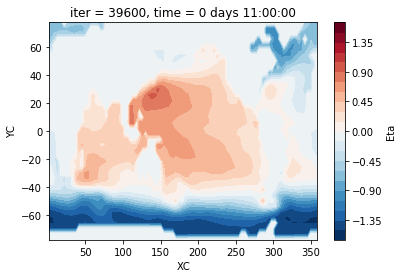

In [15]:
ds.Eta[0].plot.contourf(levels = 30)

In [16]:
surf_mask_c = ds.hFacC[0] >0

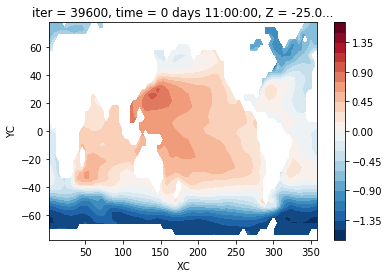

In [17]:
ds.Eta[0].where(surf_mask_c).plot.contourf(levels = 30)

In [19]:
xgcm.Grid?

Init signature: xgcm.Grid(ds, check_dims=True, periodic=True, default_shifts={}, face_connections=None, coords=None)
Docstring:     
An object with multiple :class:`xgcm.Axis` objects representing different
independent axes.
Init docstring:
Create a new Grid object from an input dataset.

Parameters
----------
ds : xarray.Dataset
    Contains the relevant grid information. Coordinate attributes
    should conform to Comodo conventions [1]_.
check_dims : bool, optional
    Whether to check the compatibility of input data dimensions before
    performing grid operations.
periodic : {True, False, list}
    Whether the grid is periodic (i.e. "wrap-around"). If a list is
    specified (e.g. ``['X', 'Y']``), the axis names in the list will be
    be periodic and any other axes founds will be assumed non-periodic.
default_shifts : dict
    A dictionary of dictionaries specifying default grid position
    shifts (e.g. ``{'X': {'center': 'left', 'left': 'center'}}``)
face_connections : dict
   

In [20]:
grid = xgcm.Grid(ds,periodic = ['X','Y'])
grid

<xgcm.Grid>
1RHO Axis (not periodic):
  * center   layer_1RHO_center (30) --> outer
  * outer    layer_1RHO_bounds (31) --> center
  * inner    layer_1RHO_interface (29) --> center
T Axis (not periodic):
  * center   time (1)
X Axis (periodic):
  * center   XC (90) --> left
  * left     XG (90) --> center
Y Axis (periodic):
  * center   YC (40) --> left
  * left     YG (40) --> center
Z Axis (not periodic):
  * center   Z (15) --> left
  * left     Zl (15) --> center
  * outer    Zp1 (16) --> center
  * right    Zu (15) --> center

In [21]:
grid.interp?

Signature: grid.interp(da, axis, **kwargs)
Docstring:
Interpolate neighboring points to the intermediate grid point along
this axis.

Parameters
----------
axis : str
    Name of the axis on which ot act
da : xarray.DataArray
    The data on which to operate
to : {'center', 'left', 'right', 'inner', 'outer'}
    The direction in which to shift the array. If not specified,
    default will be used.
boundary : {None, 'fill', 'extend'}
    A flag indicating how to handle boundaries:

    * None:  Do not apply any boundary conditions. Raise an error if
      boundary conditions are required for the operation.
    * 'fill':  Set values outside the array boundary to fill_value
      (i.e. a Neumann boundary condition.)
    * 'extend': Set values outside the array to the nearest array
      value. (i.e. a limited form of Dirichlet boundary condition.)

Returns
-------
da_i : xarray.DataArray
    The interpolated data
File:      ~/miniconda3/envs/pangeo/lib/python3.6/site-packages/xgcm/grid.py

In [22]:
ds.THETA

<xarray.DataArray 'THETA' (time: 1, Z: 15, YC: 40, XC: 90)>
array([[[[ 0.      , ...,  0.      ],
         ...,
         [ 0.010286, ..., -0.237801]],

        ...,

        [[ 0.      , ...,  0.      ],
         ...,
         [ 0.      , ...,  0.      ]]]], dtype=float32)
Coordinates:
    iter     (time) int64 ...
  * time     (time) timedelta64[ns] 11:00:00
  * XC       (XC) float32 2.0 6.0 10.0 14.0 18.0 22.0 26.0 30.0 34.0 38.0 ...
  * YC       (YC) float32 -78.0 -74.0 -70.0 -66.0 -62.0 -58.0 -54.0 -50.0 ...
  * Z        (Z) float32 -25.0 -85.0 -170.0 -290.0 -455.0 -670.0 -935.0 ...
    rA       (YC, XC) float32 ...
    Depth    (YC, XC) float32 ...
    drF      (Z) float32 ...
    PHrefC   (Z) float32 ...
    hFacC    (Z, YC, XC) float32 ...
Attributes:
    standard_name:  THETA
    long_name:      Potential Temperature
    units:          degC

In [25]:
ds.THETA.dims


('time', 'Z', 'YC', 'XC')

In [26]:
theta_x_interp = grid.interp(ds.THETA,'X')

In [28]:
theta_x_interp.dims

('time', 'Z', 'YC', 'XG')

In [24]:
grid.interp(ds.THETA,'X')

<xarray.DataArray (time: 1, Z: 15, YC: 40, XG: 90)>
array([[[[ 0.      , ...,  0.      ],
         ...,
         [-0.113758, ..., -0.320469]],

        ...,

        [[ 0.      , ...,  0.      ],
         ...,
         [ 0.      , ...,  0.      ]]]], dtype=float32)
Coordinates:
  * time     (time) timedelta64[ns] 11:00:00
  * Z        (Z) float32 -25.0 -85.0 -170.0 -290.0 -455.0 -670.0 -935.0 ...
  * YC       (YC) float32 -78.0 -74.0 -70.0 -66.0 -62.0 -58.0 -54.0 -50.0 ...
  * XG       (XG) float32 0.0 4.0 8.0 12.0 16.0 20.0 24.0 28.0 32.0 36.0 ...

In [31]:
theta_z_interp = grid.interp(ds.THETA,'Z',boundary = 'fill')

In [32]:
theta_z_interp

<xarray.DataArray (time: 1, Zl: 15, YC: 40, XC: 90)>
array([[[[ 0.      , ...,  0.      ],
         ...,
         [ 0.005143, ..., -0.118901]],

        ...,

        [[ 0.      , ...,  0.      ],
         ...,
         [ 0.      , ...,  0.      ]]]], dtype=float32)
Coordinates:
  * time     (time) timedelta64[ns] 11:00:00
  * Zl       (Zl) float32 0.0 -50.0 -120.0 -220.0 -360.0 -550.0 -790.0 ...
  * YC       (YC) float32 -78.0 -74.0 -70.0 -66.0 -62.0 -58.0 -54.0 -50.0 ...
  * XC       (XC) float32 2.0 6.0 10.0 14.0 18.0 22.0 26.0 30.0 34.0 38.0 ...

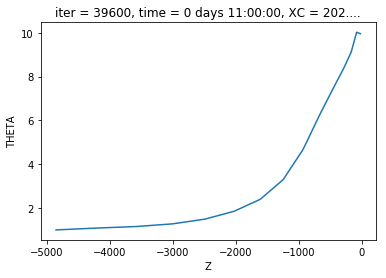

In [34]:
ds.THETA.sel(XC = 200,YC = 45, method = 'nearest').plot()


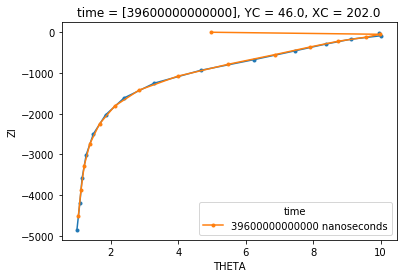

In [40]:
ds.THETA.sel(XC = 200,YC = 45, method = 'nearest').plot.line(y = 'Z',marker = '.')
theta_z_interp.sel(XC = 200,YC = 45, method = 'nearest').plot.line(y = 'Zl',marker = '.')

In [41]:
theta_z_interp = grid.interp(ds.THETA,'Z',boundary = 'extend')

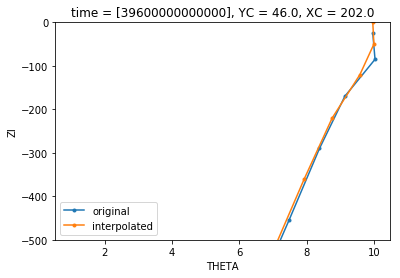

In [44]:
ds.THETA.sel(XC = 200,YC = 45, method = 'nearest').plot.line(y = 'Z',marker = '.',
                                                            label = 'original')
theta_z_interp.sel(XC = 200,YC = 45, method = 'nearest').plot.line(y = 'Zl',marker = '.',
                                                                  label = 'interpolated')
plt.ylim([-500, 0])
plt.legend(loc = 'lower left')